# Digital Signals Theory

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['axes.facecolor'] = '#f1f1f1'
plt.rcParams['figure.facecolor'] = '#f1f1f1'

## Chapter 5: The discrete Fourier transform
----

### 5.8 Exercises

#### Exercise 5.1

Given $N = 100$ and $f_{s} = 8000 \text{ cycles/sec}$, what is the lowest non-zero analysis frequency?

From Definition 5.1 (Analysis frequency) on page 96, we know:

\begin{flalign}
\qquad f_{m} &= \frac{m}{N} \times f_{s} \text{ where } m = 0, 1, 2, \ldots  & 
\end{flalign}

So the lowest non-zero analysis frequency is at $m = 1$, and

\begin{flalign}
\qquad f_{1} &= \frac{1}{100} \times 8000 \text{ cycles/sec} & \\\\
 &= 80 \text{ cycles/sec}
\end{flalign}

----

#### Exercise 5.2

Given non-zero analysis frequencies ranging from 20 - 20000 Hz, what should $f_{s}$ and $N$ be?

From the Sampling Theorem we know

\begin{flalign}
\qquad f_{m} &\in \left[ -\frac{f_{s}}{2}, \frac{f_{s}}{2}  \right] & \\\\
\end{flalign}

... and therefore

\begin{flalign}
\qquad \frac{ f_{s} }{2} &= 20000 \text{ cycles/sec} & \\\\
\qquad f_{s} &= 2 \times 20000 \text{ cycles/sec} & \\
&= 40000 \text{ cycles/sec}
\end{flalign}

... and then 

\begin{flalign}
\qquad f_{1} &= \frac{1}{N} \times f_{s}  & \\
\qquad 20 &= \frac{1}{N} \times 40000  \\\\
\qquad N  &= \frac{1}{20} \times 40000  \\
&= 2000
\end{flalign}

----

#### Exercise 5.3

Given a signal $x$ of $N$ samples; and supposing we extend this signal by padding it with an additional $N$ zeros, giving a new signal $y[n]$ of length $2 \times N$.

How does the DFT $Y[m]$ compare to the DFT of original $x$?

In particular:

* How does the set of analysis frequencies change?
* For any given frequency index $m$, how does $Y[m]$ relate to the original spectrum $X$?


##### Rather than just imagine, let's actually plot something and see

Let's see what happens when we have the following situation:

* $N$ = 200 samples
* analysis frequencies at $m = 3, 7, 19$
* signal $x$ will be a mixture $0.5 \times \theta_{m=3}$, $0.3 \times \theta_{m=7}$ and $0.2 \times \theta_{m=19}$

In [3]:
N = 200

t = np.linspace(0, 1, N, endpoint=False)

# we will set three analysis frequencies:
theta1 = 2 * np.pi * 3 * t
theta2 = 2 * np.pi * 7 * t
theta3 = 2 * np.pi * 19 * t

In [4]:
# make signal x a mixture of the three fundamental frequencies
x = .5 * np.cos(theta1) + .3 * np.cos(theta2) + .2 * np.cos(theta3)

X = np.fft.rfft(x)
mag_X = np.abs(X)

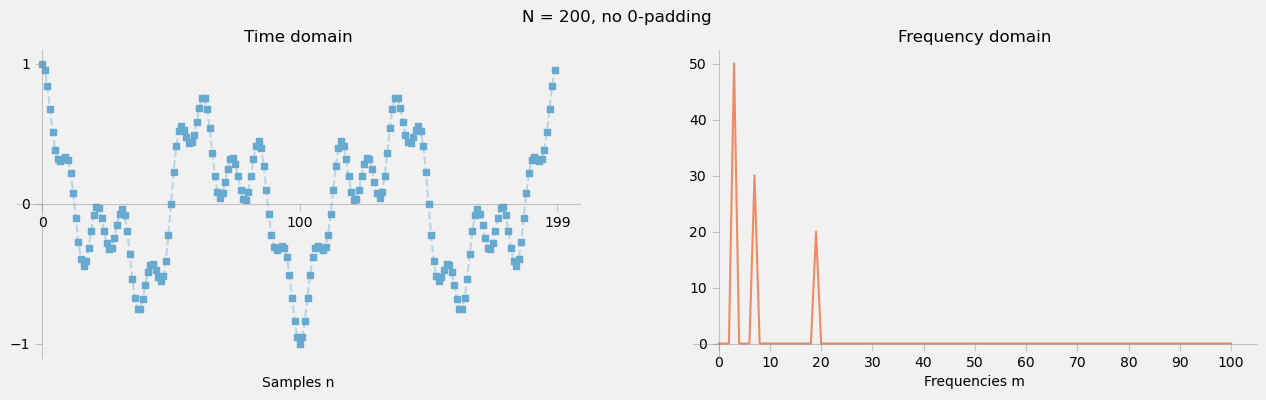

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for x in Time domain...
axes[0].scatter(t, x, color='#67a9cf', marker='s', s=18.0, zorder=-1)
axes[0].plot(t, x, color='#67a9cf', linestyle='--', alpha=0.4, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.4)
axes[0].set_yticks([x.min(), 0, x.max()])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.4)
axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X.size)
axes[1].plot(freq_idx, mag_X, color='#ef8a62')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.4)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.4)
axes[1].set_xticks(np.arange(0, N//2 + 1, 10))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle(f'N = 200, no 0-padding')
plt.show()

In [6]:
for mag in mag_X[:24]:
    print(f"X: harmonic at freq index {mag_X.tolist().index(mag)}, value is {mag}")

X: harmonic at freq index 0, value is 2.55351295663786e-15
X: harmonic at freq index 1, value is 3.779879601754282e-14
X: harmonic at freq index 2, value is 2.3176590547584743e-14
X: harmonic at freq index 3, value is 49.999999999999986
X: harmonic at freq index 4, value is 7.709687359737775e-15
X: harmonic at freq index 5, value is 4.390150913029616e-15
X: harmonic at freq index 6, value is 1.8264211043492295e-14
X: harmonic at freq index 7, value is 30.0
X: harmonic at freq index 8, value is 1.7001090542967303e-14
X: harmonic at freq index 9, value is 1.393942320499834e-14
X: harmonic at freq index 10, value is 1.9838629072928658e-14
X: harmonic at freq index 11, value is 3.069738247580747e-14
X: harmonic at freq index 12, value is 3.629302169565785e-15
X: harmonic at freq index 13, value is 2.269424561189354e-14
X: harmonic at freq index 14, value is 1.1718216951377667e-14
X: harmonic at freq index 15, value is 1.5167544533940722e-14
X: harmonic at freq index 16, value is 1.00160163

<hr style="width:50%;border-top:1px dashed;"/>

#### Appending an additional $N$ zeros...

In [7]:
t = np.linspace(0, 1, N + N, endpoint=False)

y = np.append(x, np.zeros(N))

Y = np.fft.rfft(y)
mag_Y = np.abs(Y)

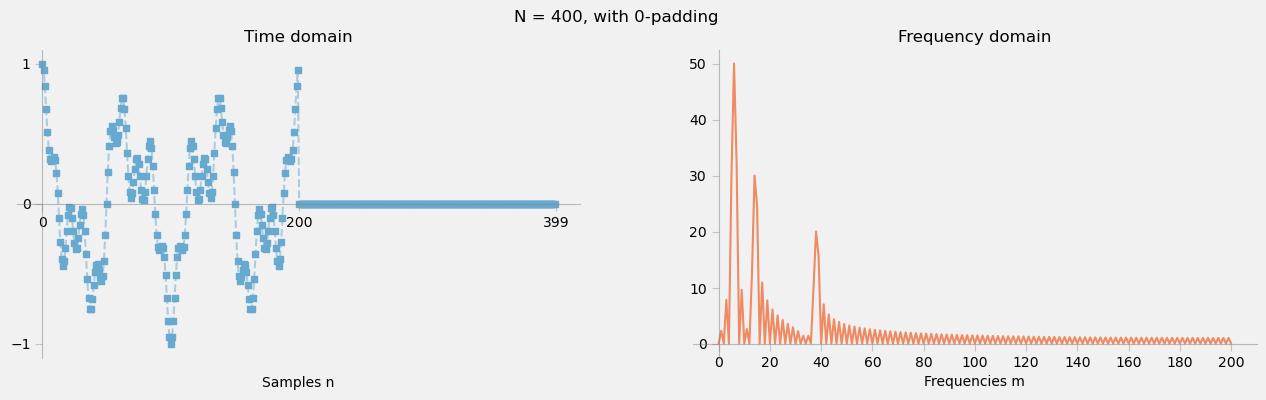

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for y in Time domain...
axes[0].scatter(t, y, color='#67a9cf', marker='s', s=18.0, zorder=-1)
axes[0].plot(t, y, color='#67a9cf', linestyle='--', alpha=0.5, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.5)
axes[0].set_yticks([y.min(), 0, y.max()])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.5)
axes[0].set_xticks([0, .5, 1.], ['0', '200', '399'])
axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(Y.size)
axes[1].plot(freq_idx, mag_Y, color='#ef8a62')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.5)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.5)
axes[1].set_xticks(np.arange(0, len(mag_Y), 20))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle(f'N = 400, with 0-padding')
plt.show()

In [9]:
for mag in mag_Y[4:41]:
    print(f"Y: harmonic at freq index {mag_Y.tolist().index(mag)}, value is {mag}")

Y: harmonic at freq index 4, value is 2.2296500283064588e-14
Y: harmonic at freq index 5, value is 30.17359352580985
Y: harmonic at freq index 6, value is 50.0
Y: harmonic at freq index 7, value is 32.329888170864706
Y: harmonic at freq index 8, value is 8.984960873972066e-15
Y: harmonic at freq index 9, value is 9.603433476524497
Y: harmonic at freq index 10, value is 5.8377129859879846e-15
Y: harmonic at freq index 11, value is 2.596017854751417
Y: harmonic at freq index 12, value is 1.976365760000402e-14
Y: harmonic at freq index 13, value is 12.502549018326675
Y: harmonic at freq index 14, value is 30.0
Y: harmonic at freq index 15, value is 24.477304028640017
Y: harmonic at freq index 16, value is 1.546527413407662e-14
Y: harmonic at freq index 17, value is 10.886420143981665
Y: harmonic at freq index 18, value is 1.5820065809473686e-14
Y: harmonic at freq index 19, value is 7.688753214386063
Y: harmonic at freq index 20, value is 1.966012896383703e-14
Y: harmonic at freq index 21

<hr style="width:50%;border-top:1px dashed;"/>

#### Appending an additional $3N$ zeros...

Now let's see what happens when we pad signal $x$ with enough zeros to extend this new signal $y$'s length to $4 \times N$.

In [10]:
t = np.linspace(0, 1, N + 3*N, endpoint=False)

y = np.append(x, np.zeros(3*N))

Y = np.fft.rfft(y)
mag_Y = np.abs(Y)

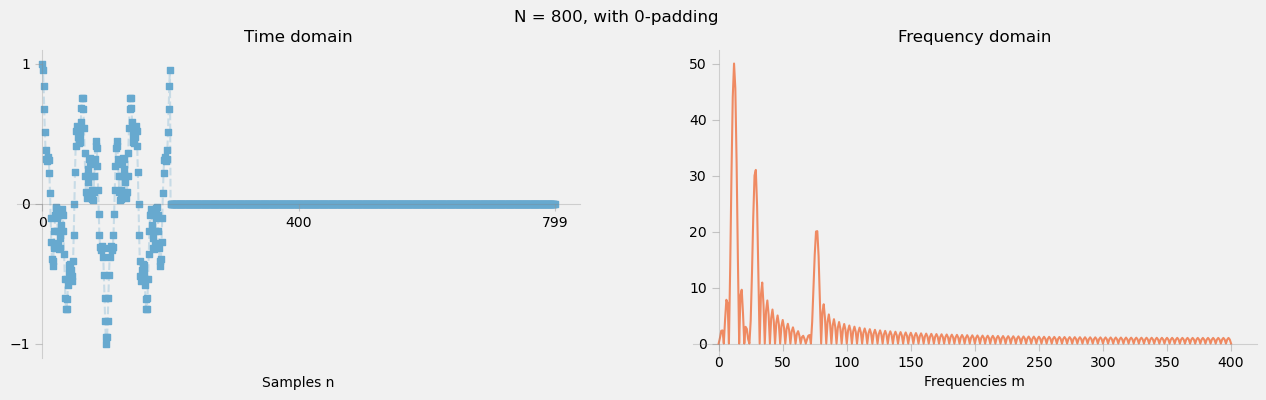

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for y in Time domain...
axes[0].scatter(t, y, color='#67a9cf', marker='s', s=18.0, zorder=-1)
axes[0].plot(t, y, color='#67a9cf', linestyle='--', alpha=0.3, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.3)
axes[0].set_yticks([y.min(), 0, y.max()])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.3)
axes[0].set_xticks([0, .5, 1.], ['0', '400', '799'])
axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(Y.size)
axes[1].plot(freq_idx, mag_Y, color='#ef8a62')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.3)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.3)
axes[1].set_xticks(np.arange(0, len(mag_Y), 50))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle(f'N = 800, with 0-padding')
plt.show()

In [12]:
for mag in mag_Y[10:79]:
    print(f"Y: harmonic at freq index {mag_Y.tolist().index(mag)}, value is {mag}")

Y: harmonic at freq index 10, value is 30.173593525809846
Y: harmonic at freq index 11, value is 44.040806327025905
Y: harmonic at freq index 12, value is 49.999999999999986
Y: harmonic at freq index 13, value is 45.58448221661002
Y: harmonic at freq index 14, value is 32.3298881708647
Y: harmonic at freq index 15, value is 15.12826878469934
Y: harmonic at freq index 16, value is 6.751028553621625e-15
Y: harmonic at freq index 17, value is 8.601960472437472
Y: harmonic at freq index 18, value is 9.603433476524495
Y: harmonic at freq index 19, value is 5.359387914630257
Y: harmonic at freq index 20, value is 5.356793490990091e-15
Y: harmonic at freq index 21, value is 2.9823369745868584
Y: harmonic at freq index 22, value is 2.596017854751418
Y: harmonic at freq index 23, value is 0.7790377094484202
Y: harmonic at freq index 24, value is 1.8533331472649594e-14
Y: harmonic at freq index 25, value is 4.074030525504517
Y: harmonic at freq index 26, value is 12.502549018326677
Y: harmonic a

----

#### Exercise 5.4

Generate three signals with the same fundamental frequency (square, triangle, sawtooth).

For each, compute its DFT and look at its magnitude spectrum.

Can you tell apart the different signal types by placement and magnitude for their harmonics?

##### Hint

Please see the `scipy.signal` Waveform APIs  [`scipy.signal.square`](https://docs.scipy.org/doc/scipy-1.14.1/reference/generated/scipy.signal.square.html) and [`scipy.signal.sawtooth`](https://docs.scipy.org/doc/scipy-1.14.1/reference/generated/scipy.signal.sawtooth.html#scipy.signal.sawtooth).

In [13]:
from scipy import signal

##### Our set up across the three signals

* $N$ = 200 samples
* fundamental frequency $m = 7$

In [14]:
N = 200

t = np.linspace(0, 1, N, endpoint=False)

f_fund = 7

theta = 2 * np.pi * f_fund * t

<hr style="width:50%;border-top:1px dashed;"/>

#### Square waveform

In [15]:
x_square = signal.square(theta)

In [16]:
X_square = np.fft.rfft(x_square)

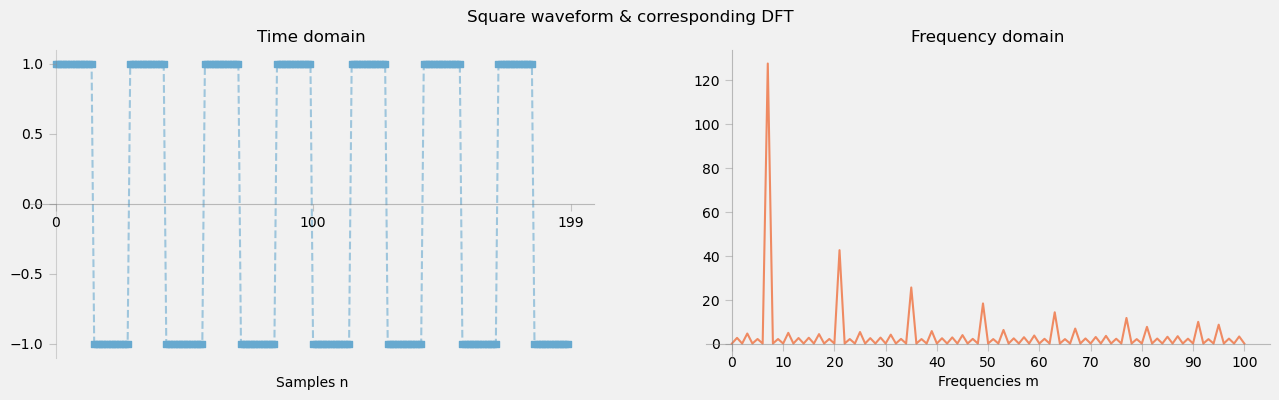

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the square wave...
axes[0].scatter(t, x_square, color='#67a9cf', marker='s', s=16.0, zorder=-1)
axes[0].plot(t, x_square, color='#67a9cf', linestyle='--', alpha=0.6, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.3)
axes[0].set_yticks([-1., -.5, 0, .5, 1.])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.5)
axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X_square.size)
axes[1].plot(freq_idx, np.abs(X_square), color='#ef8a62')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.5)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.5)
axes[1].set_xticks(np.arange(0, len(freq_idx), 10))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle('Square waveform & corresponding DFT')
plt.show()

<hr style="width:50%;border-top:1px dashed;"/>

#### Triangle waveform

In [18]:
x_triangle = signal.sawtooth(theta, 0.5)

In [19]:
X_triangle  = np.fft.rfft(x_triangle)

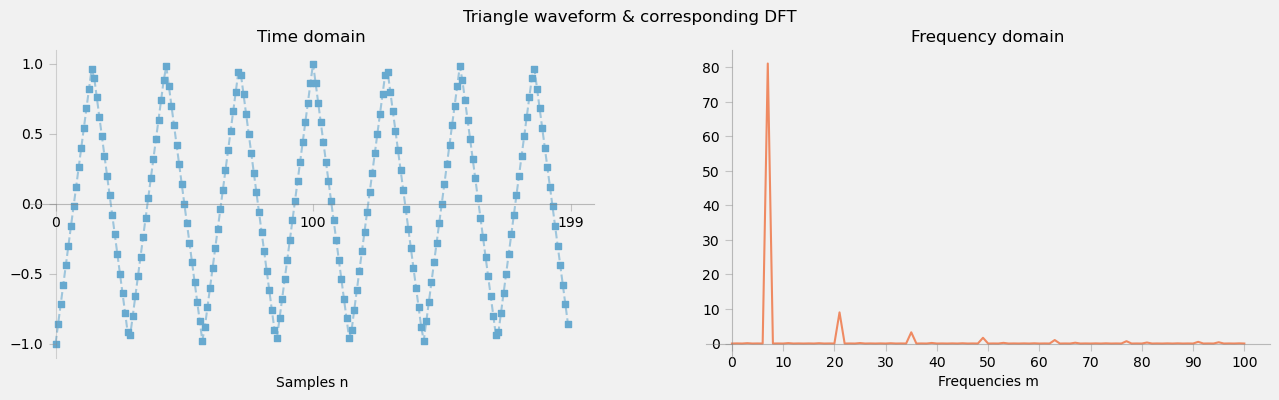

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the triangle wave...
axes[0].scatter(t, x_triangle, color='#67a9cf', marker='s', s=16.0)
axes[0].plot(t, x_triangle, color='#67a9cf', linestyle='--', alpha=0.6)


axes[0].grid(False)
axes[0].set_title('Time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.3)
axes[0].set_yticks([-1., -.5, 0, .5, 1.])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.5)
axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X_triangle.size)
axes[1].plot(freq_idx, np.abs(X_triangle), color='#ef8a62')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.5)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.5)
axes[1].set_xticks(np.arange(0, len(freq_idx), 10))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle('Triangle waveform & corresponding DFT')
plt.show()

<hr style="width:50%;border-top:1px dashed;"/>

#### Sawtooth waveform

In [21]:
x_sawtooth = signal.sawtooth(theta)

In [22]:
X_sawtooth  = np.fft.rfft(x_sawtooth)

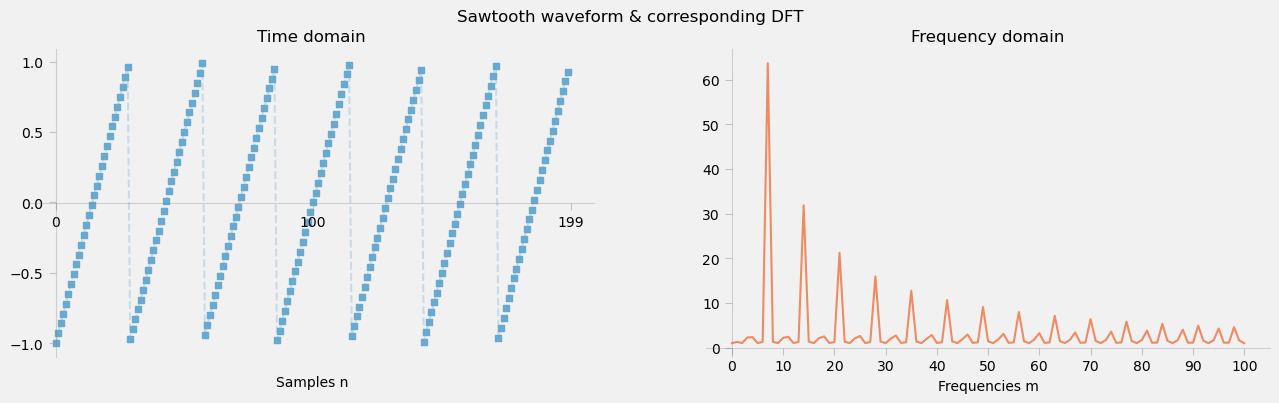

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the sawtooth wave...
axes[0].scatter(t, x_sawtooth, color='#67a9cf', marker='s', s=16.0, zorder=-1)
axes[0].plot(t, x_sawtooth, color='#67a9cf', linestyle='--', alpha=0.3, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.3)
axes[0].set_yticks([-1., -.5, 0, .5, 1.])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.3)
axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X_sawtooth.size)
axes[1].plot(freq_idx, np.abs(X_sawtooth), color='#ef8a62')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.3)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.3)
axes[1].set_xticks(np.arange(0, len(freq_idx), 10))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle('Sawtooth waveform & corresponding DFT')
plt.show()

----

#### Exercise 5.5

Generate a sinusoid at $f_{0} = 110$ for 1 second at $f_{s} = 8000 \text{ cycles/sec}$.

Then, applying quantization at the levels listed below, compute the corresponding DFT.
* 8-bit
* 4-bit
* 2-bit
* 1-bit

Compare these to the DFT of the original signal.

##### Original signal $x$

In [24]:
duration = 1
f_s = 8000
freq = 110

t = np.arange(duration * f_s) / f_s

x = np.cos(2 * np.pi * freq * t)
X  = np.fft.rfft(x)

In [25]:
N = 200

##### A `quantize` function based on the code from p.43

<span style="background-color:#33ffff">Actually, the `quantize` function on p.43 only returns `np.digitize(x, bins)` which is merely the _indices_ of the corresponding bins and _not the actual quantized value_. The following implementation goes all the way in returning an `numpy.ndarray` of the quantized values of `x` for the specified `n_bits` bit-depth.</span>


##### Parameters
* `x` : `numpy.ndarray`
* `n_bits` : integer > 0; the number of bits to use per sample

##### Returns
* `x_quantize` : `numpy.ndarray`; `x` reduced to the specified `n_bits` bit-depth

##### NOTES
* [`numpy.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html):  array object represents a multidimensional, homogeneous array of fixed-size items. An associated data-type object describes the format of each element in the array (its byte-order, how many bytes it occupies in memory, whether it is an integer, a floating point number, or something else
* [`numpy.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html): Returns `num` evenly spaced samples, calculated over the interval [`start`, `stop`].
* [`numpy.digitalize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html): Return the indices of the bins to which each value in input array belongs

In [26]:
def quantize(x, n_bits):

    bins = np.linspace(
        x.min(),
        x.max(),
        num=2**n_bits,
        endpoint=False
    )

    return [
        bins[bi-1].item()
        for bi in np.digitize(x, bins)
    ]

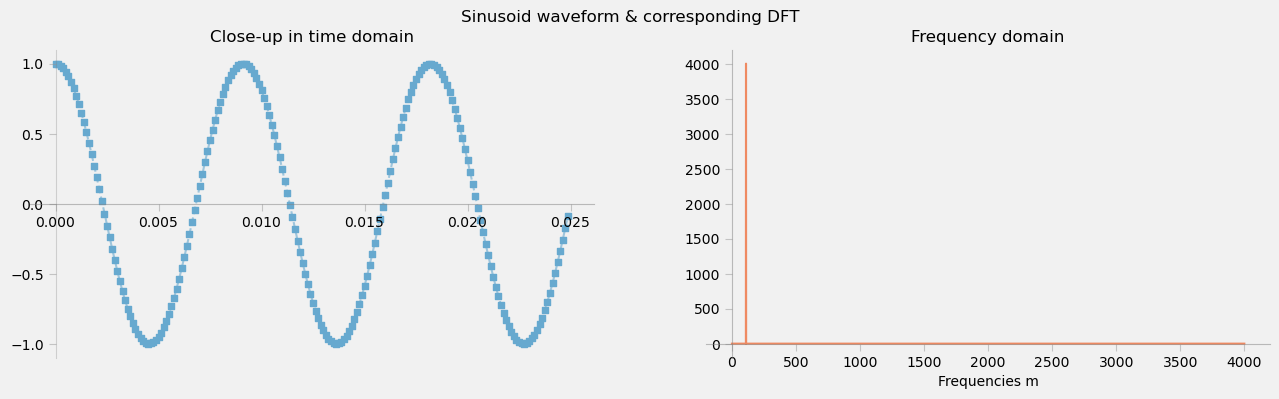

In [27]:
x_trunc = x[:N]
t_trunc = t[:N]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the sawtooth wave...
axes[0].scatter(t_trunc, x_trunc, color='#67a9cf', marker='s', s=16.0, zorder=-1)
axes[0].plot(t_trunc, x_trunc, color='#67a9cf', linestyle='--', alpha=0.6, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Close-up in time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.3)
axes[0].set_yticks([-1., -.5, 0, .5, 1.])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.5)
#axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
#axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X.size)
axes[1].plot(freq_idx, np.abs(X), color='#ef8a62')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.5)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.5)
axes[1].set_xticks(np.arange(0, len(freq_idx), 500))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle('Sinusoid waveform & corresponding DFT')
plt.show()

##### Signal $x$ with 8-bit quantization

In [28]:
x_q_8 = quantize(x, 8)

X_q_8  = np.fft.rfft(x_q_8)

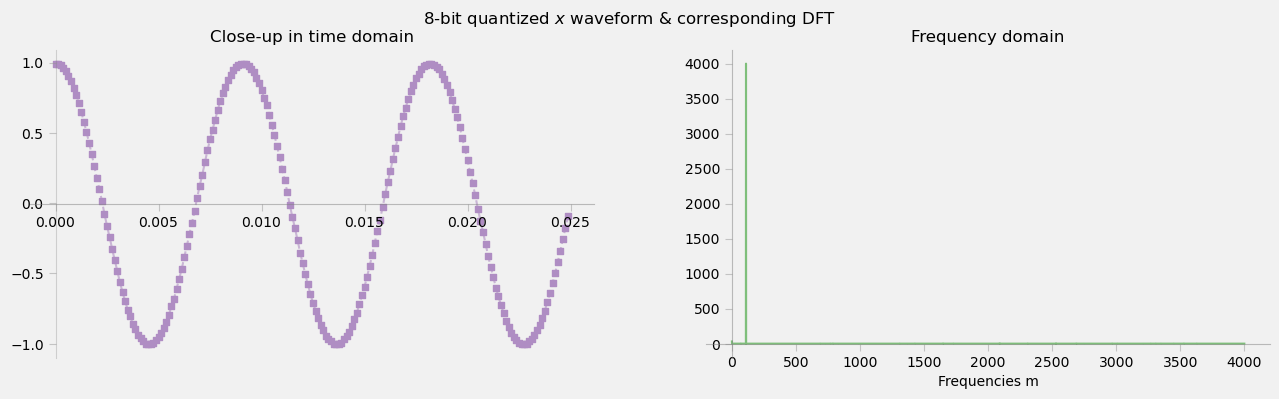

In [29]:
x_q_8_trunc = x_q_8[:N]
t_trunc = t[:N]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the sawtooth wave...
axes[0].scatter(t_trunc, x_q_8_trunc, color='#af8dc3', marker='s', s=16.0, zorder=-1)
axes[0].plot(t_trunc, x_q_8_trunc, color='#af8dc3', linestyle='--', alpha=0.6, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Close-up in time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.3)
axes[0].set_yticks([-1., -.5, 0, .5, 1.])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.5)
#axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
#axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X_q_8.size)
axes[1].plot(freq_idx, np.abs(X_q_8), color='#7fbf7b')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.5)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.5)
axes[1].set_xticks(np.arange(0, len(freq_idx), 500))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle('8-bit quantized $x$ waveform & corresponding DFT')
plt.show()

<hr style="width:50%;border-top:1px dashed;"/>

##### Signal $x$ with 4-bit quantization

In [30]:
x_q_4 = quantize(x, 4)

X_q_4  = np.fft.rfft(x_q_4)

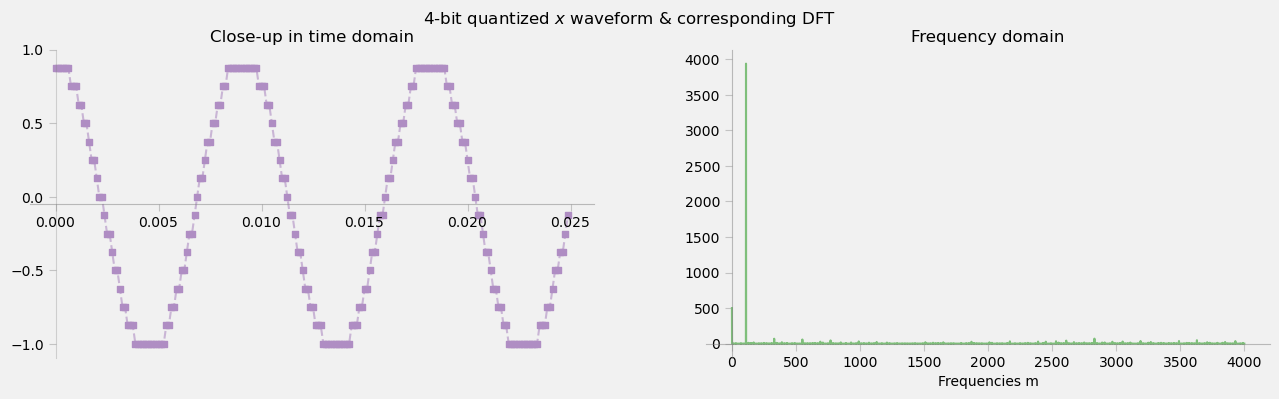

In [31]:
x_q_4_trunc = x_q_4[:N]
t_trunc = t[:N]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the sawtooth wave...
axes[0].scatter(t_trunc, x_q_4_trunc, color='#af8dc3', marker='s', s=16.0, zorder=-1)
axes[0].plot(t_trunc, x_q_4_trunc, color='#af8dc3', linestyle='--', alpha=0.6, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Close-up in time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.3)
axes[0].set_yticks([-1., -.5, 0, .5, 1.])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.5)
#axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
#axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X_q_4.size)
axes[1].plot(freq_idx, np.abs(X_q_4), color='#7fbf7b')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.5)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.5)
axes[1].set_xticks(np.arange(0, len(freq_idx), 500))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle('4-bit quantized $x$ waveform & corresponding DFT')
plt.show()

<hr style="width:50%;border-top:1px dashed;"/>

##### Signal $x$ with 2-bit quantization

In [32]:
x_q_2 = quantize(x, 2)

X_q_2  = np.fft.rfft(x_q_2)

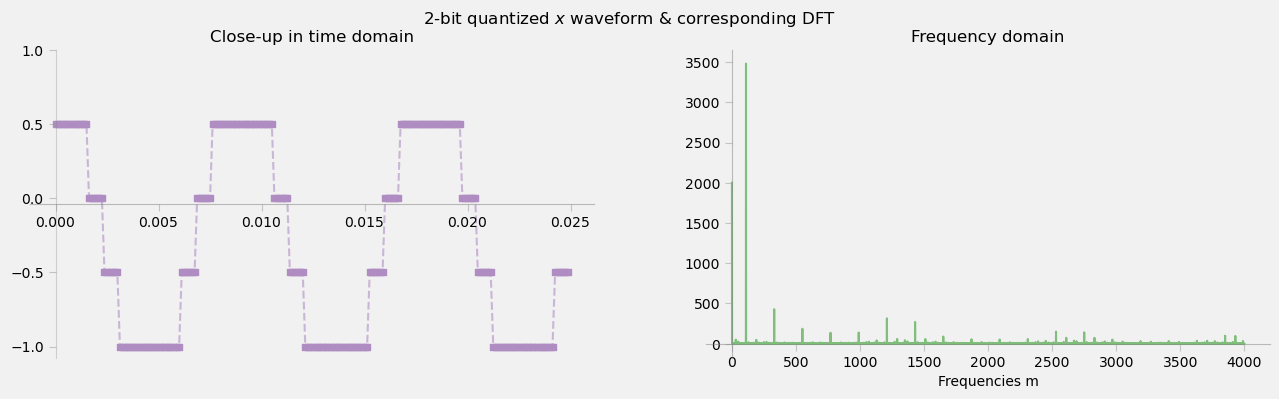

In [33]:
x_q_2_trunc = x_q_2[:N]
t_trunc = t[:N]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the sawtooth wave...
axes[0].scatter(t_trunc, x_q_2_trunc, color='#af8dc3', marker='s', s=16.0, zorder=-1)
axes[0].plot(t_trunc, x_q_2_trunc, color='#af8dc3', linestyle='--', alpha=0.6, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Close-up in time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.3)
axes[0].set_yticks([-1., -.5, 0, .5, 1.])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.5)
#axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
#axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X_q_2.size)
axes[1].plot(freq_idx, np.abs(X_q_2), color='#7fbf7b')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.5)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.5)
axes[1].set_xticks(np.arange(0, len(freq_idx), 500))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle('2-bit quantized $x$ waveform & corresponding DFT')
plt.show()

<hr style="width:50%;border-top:1px dashed;"/>

##### Signal $x$ with 1-bit quantization

In [34]:
x_q_1 = quantize(x, 1)

X_q_1  = np.fft.rfft(x_q_1)

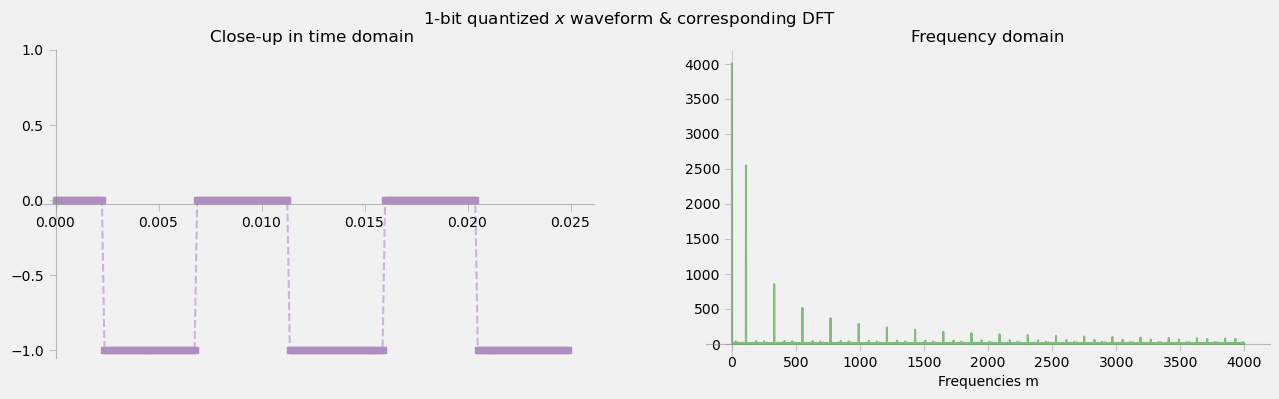

In [35]:
x_q_1_trunc = x_q_1[:N]
t_trunc = t[:N]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the sawtooth wave...
axes[0].scatter(t_trunc, x_q_1_trunc, color='#af8dc3', marker='s', s=16.0, zorder=-1)
axes[0].plot(t_trunc, x_q_1_trunc, color='#af8dc3', linestyle='--', alpha=0.6, zorder=-1)

axes[0].grid(False)
axes[0].set_title('Close-up in time domain')
# Eliminate upper and right axes
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[0].spines['left'].set_position('zero')
axes[0].spines['left'].set_color('grey')
axes[0].spines['left'].set_alpha(0.5)
axes[0].set_yticks([-1., -.5, 0, .5, 1.])
axes[0].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[0].spines['bottom'].set_position('center')
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['bottom'].set_alpha(0.5)
#axes[0].set_xticks([0, .5, 1.], ['0', f'{N//2}', f'{N-1}'])
#axes[0].set_xlabel('Samples n')
axes[0].xaxis.set_label_coords(0.5, -0.06)
axes[0].tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx = np.arange(X_q_1.size)
axes[1].plot(freq_idx, np.abs(X_q_1), color='#7fbf7b')

axes[1].grid(False)
axes[1].set_title('Frequency domain')
# Eliminate upper and right axes
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
axes[1].spines['left'].set_position('zero')
axes[1].spines['left'].set_color('grey')
axes[1].spines['left'].set_alpha(0.3)
axes[1].tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['bottom'].set_alpha(0.5)
axes[1].set_xticks(np.arange(0, len(freq_idx), 500))
axes[1].set_xlabel('Frequencies m')
axes[1].tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.suptitle('1-bit quantized $x$ waveform & corresponding DFT')
plt.show()

----

#### Exercise 5.6

Find a recording (of some musical instrument) of the note D#5.

Using the code provided on p.117 for analyzing the trumpet recording, compute the DFT and magnitude spectrum.

How does its spectrum compare to that of the trumpet?

##### NOTES

* The [trumpetF3.wav file at Freesound](https://freesound.org/people/slothrop/sounds/48224/)
* 

In [36]:
import soundfile as sf

from IPython.display import Audio, display

fin1 = 'bin/48224__slothrop__trumpetf3.wav'
print(sf.info(fin1))

bin/48224__slothrop__trumpetf3.wav
samplerate: 44100 Hz
channels: 1
duration: 38912 samples
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]


In [37]:
x_trumpet, fs_trumpet = sf.read(fin1)

N_trumpet = len(x_trumpet)
time_trumpet = np.arange(N_trumpet)

X_trumpet = np.fft.fft(x_trumpet)

In [38]:
display(f'Trumpet F3')
display(Audio(data=x_trumpet, rate=fs_trumpet))

'Trumpet F3'

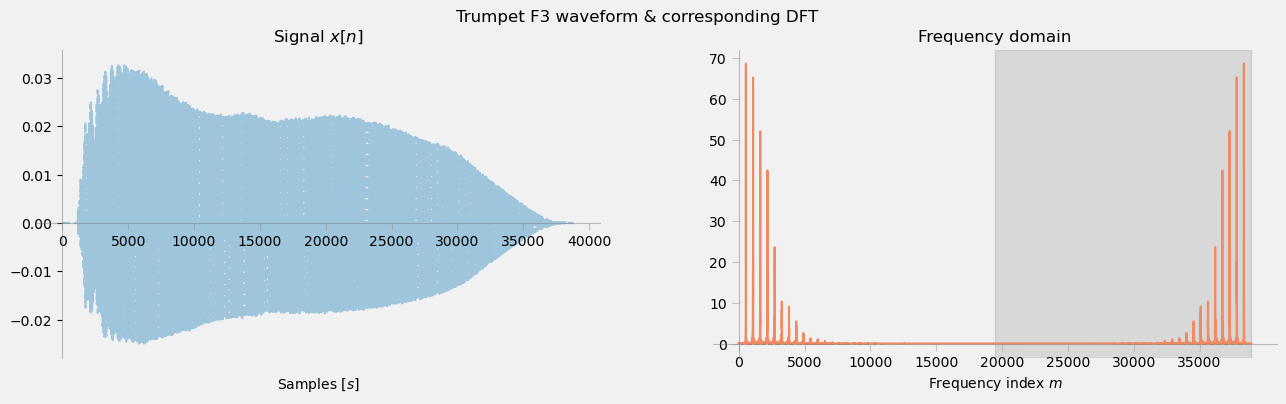

In [39]:
fig, (ax_time, ax_freq) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the trumpet F3 waveform...
ax_time.plot(time_trumpet, x_trumpet, color='#67a9cf', linestyle='--', alpha=0.6, zorder=-1)

ax_time.grid(False)
ax_time.set_title('Signal $x[n]$')
# Eliminate upper and right axes
ax_time.spines['right'].set_color('none')
ax_time.spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
ax_time.spines['left'].set_position('zero')
ax_time.spines['left'].set_color('grey')
ax_time.spines['left'].set_alpha(0.5)

# Move bottom x-axis, passing through center of plot
ax_time.spines['bottom'].set_position('zero')
ax_time.spines['bottom'].set_color('grey')
ax_time.spines['bottom'].set_alpha(0.5)
ax_time.set_xlabel('Samples $[s]$')
ax_time.xaxis.set_label_coords(0.5, -0.06)
ax_time.tick_params(axis='x', which=u'both', length=5, color='#96969680')

# -----------------------------------
# 2nd plot for the corresponding DFT 
freq_idx_trumpet = np.arange(X_trumpet.size)
ax_freq.plot(freq_idx_trumpet, np.abs(X_trumpet), color='#ef8a62')

ax_freq.grid(False)
ax_freq.set_title('Frequency domain')
# Eliminate upper and right axes
ax_freq.spines['right'].set_color('none')
ax_freq.spines['top'].set_color('none')
ax_freq.spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
ax_freq.spines['left'].set_position('zero')
ax_freq.spines['left'].set_color('grey')
ax_freq.spines['left'].set_alpha(0.5)
ax_freq.tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
ax_freq.spines['bottom'].set_position('zero')
ax_freq.spines['bottom'].set_color('grey')
ax_freq.spines['bottom'].set_alpha(0.5)
ax_freq.set_xticks(np.arange(0, len(freq_idx_trumpet), 5000))
ax_freq.set_xlabel('Frequency index $m$')
ax_freq.tick_params(axis='x', which=u'both', length=5, color='#96969680')

ax_freq.axvspan(N_trumpet/2, N_trumpet, color='k', alpha=0.1, zorder=-1)

plt.suptitle('Trumpet F3 waveform & corresponding DFT')
plt.show()

<hr width=40%/>

In [40]:
fin2 = 'bin/153699__carlos_vaquero__viola-d-4-tenuto-vibrato.wav'
print(sf.info(fin2))

bin/153699__carlos_vaquero__viola-d-4-tenuto-vibrato.wav
samplerate: 44100 Hz
channels: 2
duration: 4.649 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]


In [41]:
# convert 2-channel STEREO to MONO
stereo_x_viola, fs_viola = sf.read(fin2)

mono_x_viola = stereo_x_viola[:,0]/2 + stereo_x_viola[:,1]/2

In [42]:
display('Viola D#-4 Tenuto Vibrato (MONO)')
display(Audio(data=mono_x_viola.T, rate=fs_viola))

'Viola D#-4 Tenuto Vibrato (MONO)'

In [43]:
N_viola = len(mono_x_viola)
time_viola = np.arange(N_viola)

X_viola = np.fft.fft(mono_x_viola)

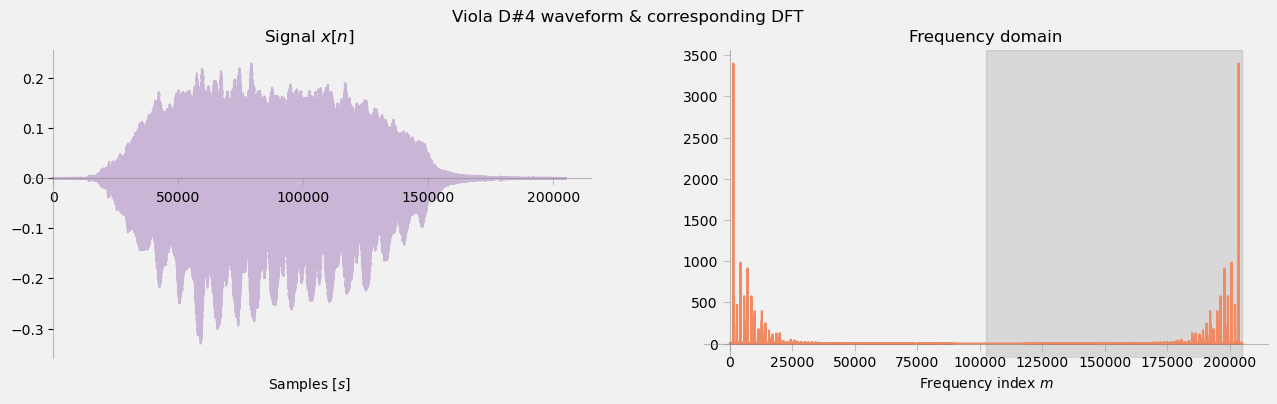

In [44]:
fig, (ax_time, ax_freq) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# 1st plot for the viola D#4 waveform...
ax_time.plot(time_viola, mono_x_viola, color='#af8dc3', linestyle='--', alpha=0.6, zorder=-1)

ax_time.grid(False)
ax_time.set_title('Signal $x[n]$')
# Eliminate upper and right axes
ax_time.spines['right'].set_color('none')
ax_time.spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
ax_time.spines['left'].set_position('zero')
ax_time.spines['left'].set_color('grey')
ax_time.spines['left'].set_alpha(0.5)

# Move bottom x-axis, passing through center of plot
ax_time.spines['bottom'].set_position('zero')
ax_time.spines['bottom'].set_color('grey')
ax_time.spines['bottom'].set_alpha(0.5)
ax_time.set_xlabel('Samples $[s]$')
ax_time.xaxis.set_label_coords(0.5, -0.06)
ax_time.tick_params(axis='x', which=u'both', length=5, color='#96969680')

#ax_freq.plot(np.abs(X))

# -----------------------------------
# 2nd plot for the corresponding DFT
freq_idx_viola = np.arange(X_viola.size)
ax_freq.plot(freq_idx_viola, np.abs(X_viola), color='#ef8a62')

ax_freq.grid(False)
ax_freq.set_title('Frequency domain')
# Eliminate upper and right axes
ax_freq.spines['right'].set_color('none')
ax_freq.spines['top'].set_color('none')
ax_freq.spines['bottom'].set_color('none')

# Move left y-axis, passing through (0,0)
ax_freq.spines['left'].set_position('zero')
ax_freq.spines['left'].set_color('grey')
ax_freq.spines['left'].set_alpha(0.5)
ax_freq.tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
ax_freq.spines['bottom'].set_position('zero')
ax_freq.spines['bottom'].set_color('grey')
ax_freq.spines['bottom'].set_alpha(0.5)
ax_freq.set_xticks(np.arange(0, len(freq_idx_viola), 25_000))
ax_freq.set_xlabel('Frequency index $m$')
ax_freq.tick_params(axis='x', which=u'both', length=5, color='#96969680')

ax_freq.axvspan(N_viola/2, N_viola, color='k', alpha=0.1, zorder=-1)

plt.suptitle('Viola D#4 waveform & corresponding DFT')
plt.show()